# Lineární klasifikace do více tříd pomocí funkce Softmax

Úloha zaměřená na implementaci paralelního lineární klasifikáru pomocí funkce softmax.


### Softmax
- Funkce softmax má c vstupů a c výstupů. 
- Všechny výstupy jsou kladná čísla. 
- Součet všech výstupů dohromady je roven číslu 1.
$$\widehat{y_c} = softmax(u) = \frac{e^{u_c}}{\sum_{d=0}^{c} {e^{u_d}}} $$

Výsledkem klasifikace je třída, pro kterou je hodnota softmaxu nejvyšší.

### Odhad parametrů modelu

Model nemá jeden vektor parametrů $\theta$, ale matici parametrů $\Theta$

Příklad:
- Vektor $x$ má dimenzi 3 (3 příznaky)
- Klasifikujeme do 4 tříd
$$ \Theta^T = 
        \begin{bmatrix}
        [\theta_{00} & \theta_{01} & \theta_{02} & \theta_{03}] \\
        [\theta_{10} & \theta_{11} & \theta_{12} & \theta_{13}] \\
        [\theta_{20} & \theta_{21} & \theta_{22} & \theta_{23}] \\
        [\theta_{30} & \theta_{31} & \theta_{32} & \theta_{33}] \\
        \end{bmatrix}  $$

#### Pomoc sumy:

$$ \Theta_{t+1} = \Theta_{t} - \alpha \sum_{i=0}^{N} {x_i}^T (\widehat{y_i} - y_i) $$
kde $\alpha$ je velikost kroku (learning rate), 

$y_i$ je vektor, obsahující hodnotu 1 na indexu správné třídy: $y_i \in [...0, 0, 1, 0,..]$,

$\widehat{y_i} = softmax(x_i^T \Theta)^T$


#### Pomocí  matice:
Maticová implementace je řádově výpočetně efektivnější.

$$ \Theta_{t+1} = \Theta_{t} - \alpha X^T (\widehat{Y} - Y) $$
$Y$ je matice nul a jedniček dle indexů tříd v datech (one_hot_encoding), 

#### Postup:
1. Parametr $\theta$ (resp. váhy $w$ a bias $b$) se inicializuje na malé náhodné hodnoty
2. Na vstup se přivedou všechna trénovací data a na výstupu se tím pádem objeví posloupnost nul a jedniček (obsahuje chyby)
3. Na základě chyb se upraví hodnoty vah
4. Kroky 2. a 3. se postupně opakují dokud dostatečně klesá chybovost klasifikátoru (nebo podle počtu iteraci)



### Klasifikace pro 2 třídy:


In [1]:
import numpy as np
import usu
import matplotlib.pyplot as plt

def show_loss(iterations, loss, epoch=False):
    plt.plot(iterations, loss)
    plt.xlabel("Epocha" if epoch else "Iterace")
    plt.ylabel("Loss")
    plt.title("Průběh trénování")
    plt.show()

npzfile = np.load('data/data_07_2cl.npz')

data = npzfile['data']
ref = npzfile['ref']
data.shape, ref.shape



((100, 2), (100, 1))

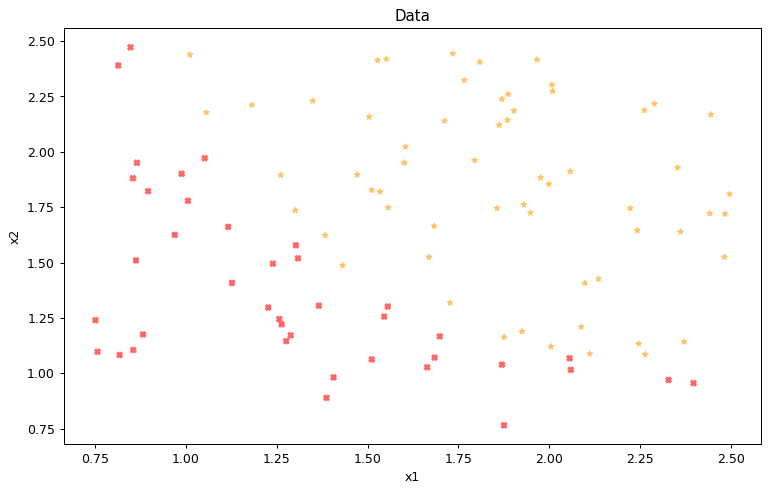

In [3]:
usu.drawSoftmax(data,ref)

In [3]:
def softmax(u):
    """
    vstupem muze byt skalar, vektor, nebo matice
    """
    #################################################################
    # ZDE DOPLNIT

    y = np.exp(u) / np.sum(np.exp(u), axis=0, keepdims=True)

    #################################################################
    return y


usu.checkSoftmax(softmax)

True

In [ ]:
def computeThetaGD(x, y, alpha=0.01, iterations=1000, plot_loss=False):
    # pro kazdou iteraci vypoctete loss a zapiste ho na odpovidajici index v promenne
    loss = np.zeros(iterations)

    #################################################################
    # ZDE DOPLNIT
    D = x.shape[1]
    n_classes = len(np.unique(y))

    theta = np.zeros((D + 1, n_classes))
    ones_vec = np.ones((x.shape[0], 1))
    X = np.hstack([ones_vec, x])

    y_onehot = np.zeros((x.shape[0], n_classes))
    for i in range(x.shape[0]):
        y_onehot[i, y[i]] = 1

    for i in range(iterations):
        smax = softmax((X @ theta).T).T
        theta = theta - alpha * X.T @ (smax - y_onehot)
        loss[i] = -np.sum(y_onehot * np.log(smax)) / x.shape[0]
    #################################################################

    if plot_loss:
        show_loss(np.arange(iterations), loss)

    return theta


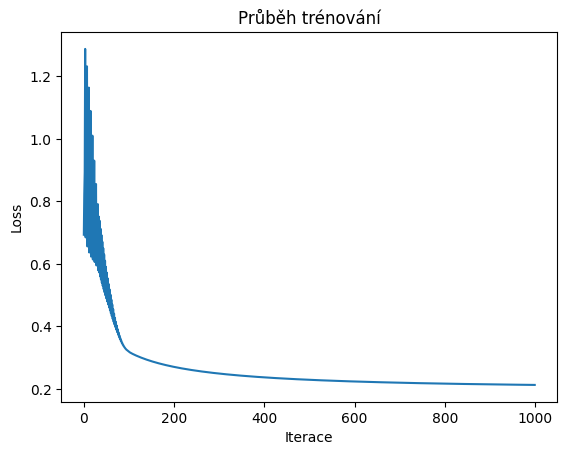

array([[ 9.10851553, -9.10851553],
       [-3.01430677,  3.01430677],
       [-2.90413336,  2.90413336]])

In [5]:
theta = computeThetaGD(data, ref, plot_loss=True)
theta

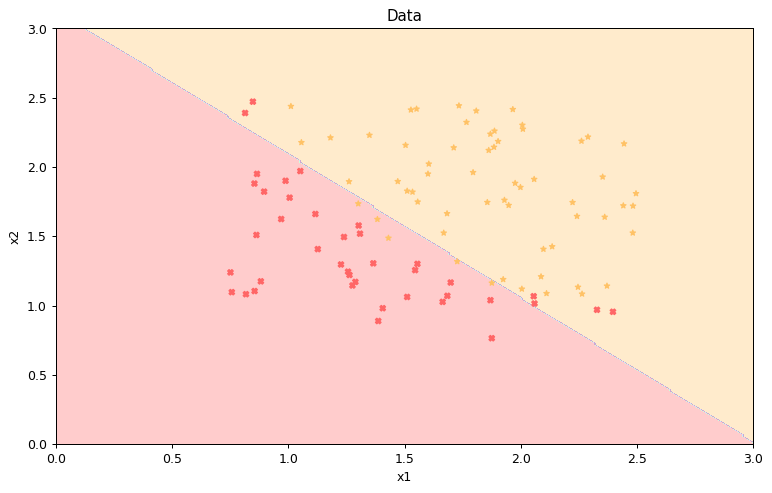

In [40]:
usu.drawSoftmax(data, ref, theta, softmax)

In [6]:
def predict(x,theta):
    #################################################################
    # ZDE DOPLNIT
    ones_vec = np.ones((x.shape[0], 1))
    X = np.hstack([ones_vec, x])
    scores = X @ theta
    classes = np.argmax(scores, axis=1)
    #################################################################
    return classes


In [7]:
x_pred = np.array([[1, 1],[ 2, 2]])
predict(x_pred,theta)


array([0, 1])

### Klasifikace pro více tříd:
#### 3 třídy:


In [8]:
npzfile = np.load('data/data_07_3cl_ez.npz') 

data = npzfile['data']
ref = npzfile['ref']

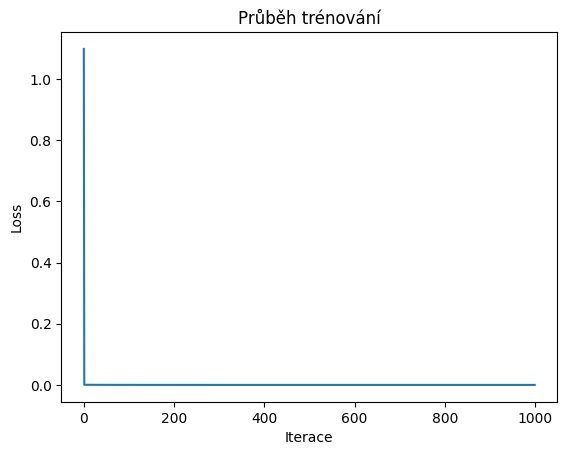

array([[ 5.07711635e-01, -5.03105973e-01, -4.60566172e-03],
       [ 2.72038774e+00,  5.91185553e+00, -8.63224327e+00],
       [-7.47227524e+00,  4.70478069e+00,  2.76749455e+00]])

In [9]:
theta = computeThetaGD(data, ref, plot_loss=True)
theta

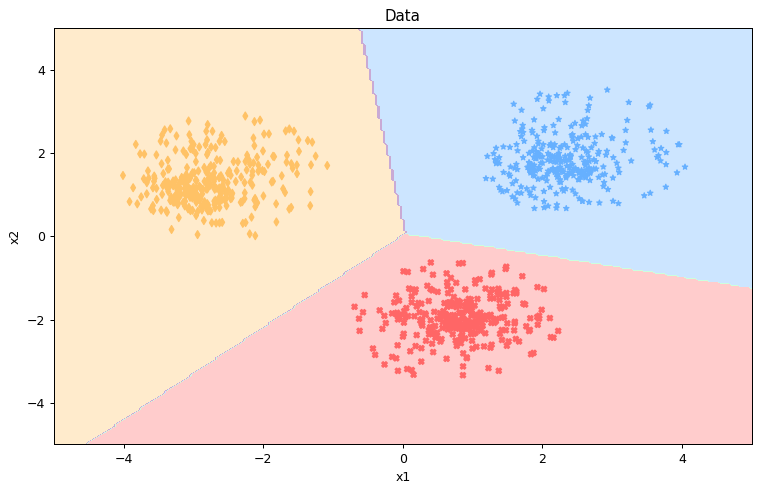

In [10]:
usu.drawSoftmax(data, ref, theta, softmax)


In [11]:
x_pred = np.array([[-3, 1],[ 0, -2],[ 3, 2]])
predict(x_pred,theta)


array([2, 0, 1])

#### 4 třídy:

In [12]:
npzfile = np.load('data/data_07_4cl.npz')

data = npzfile['data']
ref = npzfile['ref']


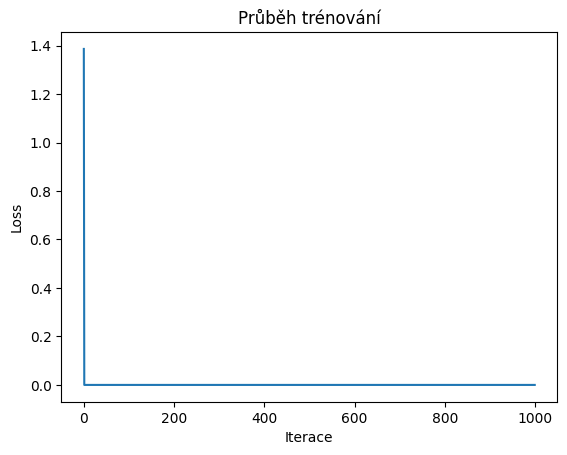

array([[-1.69592530e-04,  1.78920810e-04,  2.52757259e-05,
        -3.46040058e-05],
       [ 8.17559935e+00,  6.92671210e+00, -7.25371298e+00,
        -7.84859846e+00],
       [-6.79704211e+00,  6.90764576e+00, -7.30088112e+00,
         7.19027748e+00]])

In [13]:
theta = computeThetaGD(data, ref, plot_loss=True)
theta

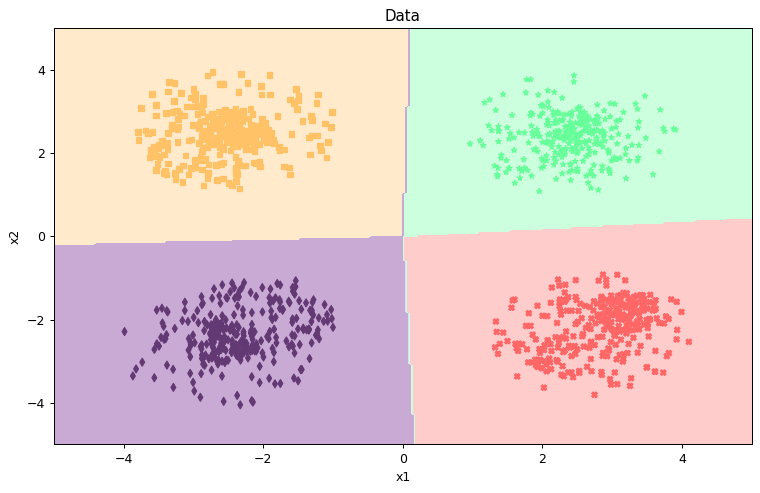

In [14]:
usu.drawSoftmax(data, ref, theta, softmax)


In [15]:
x_pred = np.array([[-3, -1],[ -3, 2],[ 3, -1],[ 3, 2]])
predict(x_pred,theta)


array([2, 3, 0, 1])

#### 5 tříd:

In [16]:
npzfile = np.load('data/data_07_5cl.npz')

data = npzfile['data']
ref = npzfile['ref']


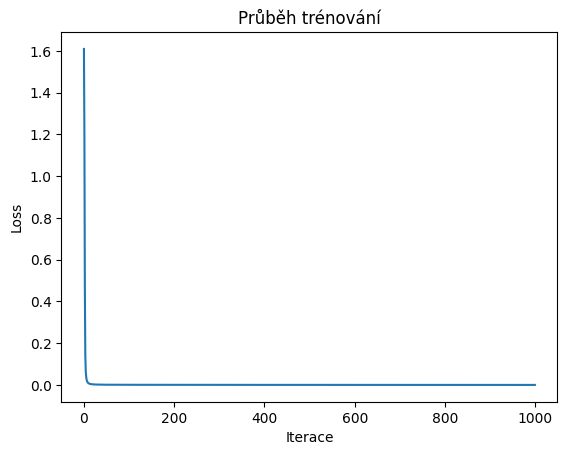

array([[-2.48175733, -3.17075268, -3.11566359, -2.61417318, 11.38234678],
       [ 7.25756266,  6.37331542, -6.94692967, -6.42019195, -0.26375646],
       [-5.6309561 ,  6.33801352, -6.94636603,  6.31988487, -0.08057625]])

In [17]:
theta = computeThetaGD(data, ref, plot_loss=True)
theta

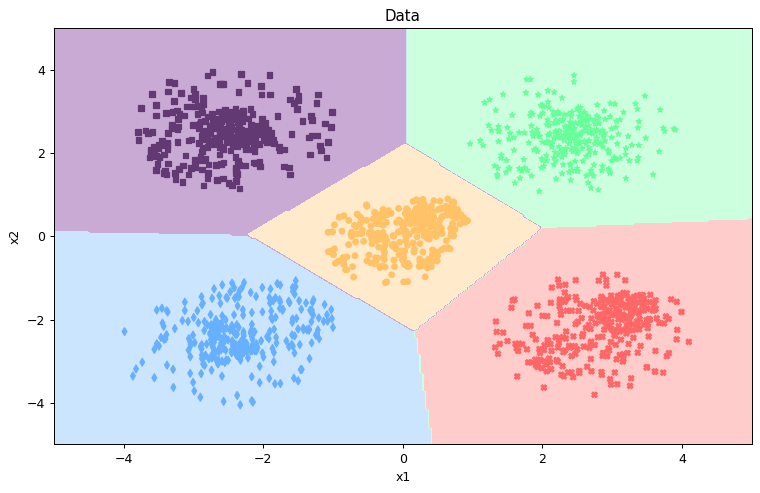

In [18]:
usu.drawSoftmax(data, ref, theta, softmax)


In [19]:
x_pred = np.array([[-3, -1],[ -3, 2],[ 3, -1],[ 3, 2],[0, 0]])
predict(x_pred,theta)


array([2, 3, 0, 1, 4])

# BONUS: Rozpoznávání číslovek (MNIST database) a mini-batch gradient descent

### **Dosáhněte accuracy (vypočtené na konci) alespoň 91 %.**

In [ ]:
npzfile = np.load('data/data_07_mnist_train.npz') 

data = npzfile['data']
ref = npzfile['ref']

Prohlédněte si prvních 20 trénovacích vzorků:

In [ ]:
plt.figure(figsize=(10, 6))
for i in range(20):
    # Prevedeni linearizovych dat zpet na 2D matici.
    img = np.reshape(data[i], (28, 28))
    plt.subplot(4, 5, i+1)
    plt.imshow(img, "gray_r")
    plt.title(ref[i])
    plt.axis("off") 
plt.show()

Naimplementuje trénování modelu pomocí mini-batch gradient descent:

Mini-batch gradient descent vzhledem k množství dat zefektivní trénování (model se natrénuje rychleji a lépe zobecňuje).

Vyjděte z předchozí implementace `computeThetaGD` a upravte ji.

Počet iterací (u GD ekvivalentní průchodu všemi testovacími daty) bude nahrazen počtem tzv. epoch.

Jedna epocha probíhá následovně:
- Na začátku se náhodně zamíchají testovací data.
- Všechna testovací data se projdou po mini-batchích, jejichž délka je vždy rovna zadané `batch_size`. Na základě každého mini-batche se aktualizují váhy (u `computeThetaGD` se aktualizovaly váhy na základě všech dat). Pokud by na konci epochy zbyly vzorky, jejichž počet už je menší než `batch_size`, tak se přeskočí.
- Na konci epochy se spočítá loss na základě všech dat pro vizualizaci.

TIP: Vhodně normalizujte úpravu vah, aby její výsledná velikost nezávisela na `batch_size` a parametry `alpha` a `batch_size` jste mohli ladit nezávisle na sobě.

In [ ]:
def computeThetaSGD(x, y, *, alpha, epochs, batch_size, plot_loss=False):
    # zafixovani nahody pri trenovani
    np.random.seed(0)

    # na konci kazde epochy vypoctete loss (ze vsech trenovacich vzorku) a zapiste ho na odpovidajici index v promenne
    loss = np.zeros(epochs)

    #################################################################
    # ZDE DOPLNIT

    ...
    
    #################################################################

    if plot_loss:
        show_loss(np.arange(epochs), loss, epoch=True)

    return theta


In [ ]:
 # ZDE DOPLNIT hodnoty hyperparametrů (dostatečný model lze natrénovat během 5-10 sekund)
theta = computeThetaSGD(data, ref, batch_size=..., epochs=..., alpha=..., plot_loss=True)
#################################################################

theta

Prohlédněte si natrénované váhy (s výjimkou biasu):

In [ ]:
for i in range(theta.shape[1]):
    # Prvni vaha je bias, zbytek odpovida bodum v obrazu, takze je preskupime na 2D obraz.
    img = np.reshape(theta.T[i][1:], (28, 28))
    plt.subplot(2, 5, i+1)
    plt.imshow(img, "gray_r")
    plt.title(str(i))
    plt.axis("off") 
plt.show()

In [ ]:
npzfile = np.load('data/data_07_mnist_test.npz') 

test_data = npzfile['data']
test_ref = npzfile['ref']

Otestujte prvních 20 testovacích vzorků:

In [ ]:
n = 20
x = test_data[:n, :]
y = test_ref[:n]

#################################################################
# ZDE DOPLNIT - Zjistete predikovane tridy pro `x`

y_pred = ...

#################################################################

plt.figure(figsize=(10, 6))
for i in range(n):
    # Prevedeni linearizovych dat zpet na 2D matici.
    img = np.reshape(x[i, :], (28, 28))
    plt.subplot(4, 5, i+1)
    plt.tight_layout(pad=3.0)
    plt.imshow(img, "gray_r")
    plt.title(f"predicted: {y_pred[i]}\nactual: {y[i]}")
    plt.axis("off")
plt.show()

Accuracy – přesnost natrénovaného modelu:

In [ ]:
#################################################################
# ZDE DOPLNIT - Zjistete predikovane tridy pro vsechna testovaci data a procento spravne predikovanych dat (accuracy).

accuracy = ...

#################################################################

print(f"Accuracy: {accuracy * 100}%")

Navíc: všimněte si, jak se mění grafy vah, když zvyšujete/snižujete batch size.